In [18]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np; np.random.seed(42)
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib import offsetbox
%matplotlib notebook

In [36]:
def hover(event):
	# if the mouse is over the scatter points
	if line.contains(event)[0]:
		# find out the index within the array from the event
		ind, = line.contains(event)[1]["ind"]
		# get the figure size
		w,h = fig.get_size_inches()*fig.dpi
		ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
		hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
		# if event occurs in the top or right quadrant of the figure,
		# change the annotation box position relative to mouse.
		ab.xybox = (xybox[0]*ws, xybox[1]*hs)
		# make annotation box visible
		ab.set_visible(True)
		# place it at the position of the hovered scatter point
		ab.xy =(x[ind], y[ind])
		# set the image corresponding to that point
		im.set_data(arr[ind,:,:])
	else:
		#if the mouse is not over a scatter point
		ab.set_visible(False)
	fig.canvas.draw_idle()


In [37]:
data0 = pd.read_csv('B:\\Lab\\Spanning\\Spanning Data\\2018_12_07\\Gap0_PCA__gaponlyDifference.csv')
data1 = pd.read_csv('B:\\Lab\\Spanning\\Spanning Data\\2018_12_07\\Gap1_PCA__gaponlyDifference.csv')
data3 = pd.read_csv('B:\\Lab\\Spanning\\Spanning Data\\2018_12_07\\Gap3_PCA__gaponlyDifference.csv')
data4 = pd.read_csv('B:\\Lab\\Spanning\\Spanning Data\\2018_12_07\\Gap4_PCA__gaponlyDifference.csv')
data5 = pd.read_csv('B:\\Lab\\Spanning\\Spanning Data\\2018_12_07\\Gap5_PCA__gaponlyDifference.csv')
data6 = pd.read_csv('B:\\Lab\\Spanning\\Spanning Data\\2018_12_07\\Gap6_PCA__gaponlyDifference.csv')
data7 = pd.read_csv('B:\\Lab\\Spanning\\Spanning Data\\2018_12_07\\Gap7_PCA__gaponlyDifference.csv')
data8 = pd.read_csv('B:\\Lab\\Spanning\\Spanning Data\\2018_12_07\\Gap8_PCA__gaponlyDifference.csv')
data9 = pd.read_csv('B:\\Lab\\Spanning\\Spanning Data\\2018_12_07\\Gap9_PCA__gaponlyDifference.csv')
data10 = pd.read_csv('B:\\Lab\\Spanning\\Spanning Data\\2018_12_07\\Gap10_PCA__gaponlyDifference.csv')
data11 = pd.read_csv('B:\\Lab\\Spanning\\Spanning Data\\2018_12_07\\Gap11_PCA__gaponlyDifference.csv')

gap = 0

if gap == 0:
    data = data0
elif gap == 1:
    data = data1
elif gap == 3:
    data = data3
elif gap == 4:
    data = data4
elif gap == 5:
    data = data5
elif gap == 6:
    data = data6
elif gap == 7:
    data = data7
elif gap == 8:
    data = data8
elif gap == 9:
    data = data9
elif gap == 10:
    data = data10
elif gap == 12:
    data = data11

                      

<IPython.core.display.Javascript object>


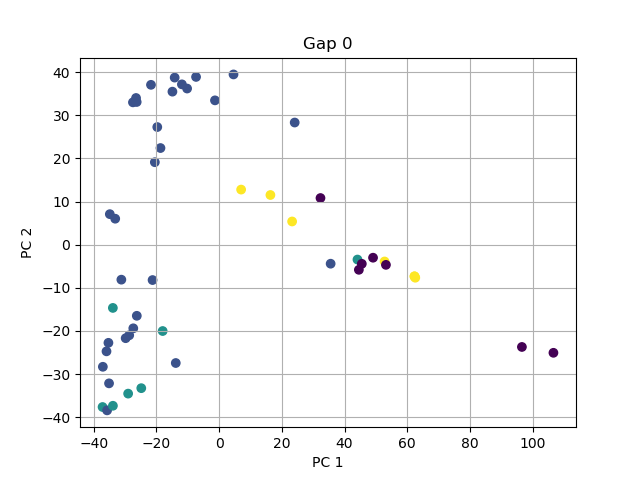

In [38]:
data = pd.read_csv('B:\\Lab\\Spanning\\Spanning Data\\2018_12_07\\Gap0_PCA__gaponlyDifference.csv')

# Generate data x, y for scatter and an array of images.
x = np.array(data.score1)
y = np.array(data.score2)
z = np.array(data.score3)

testpic = cv2.imread( data.fullpathFinal[1] , cv2.IMREAD_GRAYSCALE)

xfac = 0.05
yfac = 0.05

testpic = cv2.resize(testpic, (0,0) , fx = xfac, fy = yfac )
m = testpic.shape[0]
n = testpic.shape[1]

arr = np.empty((len(data), m , n ))
#assign images into arr[image_index, rows, cols]
for i in range(len(data)):
	#f = np.random.rand(5,5)
	#arr[i, 0:5,0:5] = f
	#arr[i, 5:,0:5] =np.flipud(f)
	#arr[i, 5:,5:] =np.fliplr(np.flipud(f))
	#arr[i, 0:5:,5:] = np.fliplr(f)
	curr_pic = cv2.imread( data.fullpathFinal[i] , cv2.IMREAD_GRAYSCALE)
	curr_pic = cv2.resize(curr_pic, (0,0) , fx = xfac , fy = yfac )
	arr[i, 0:m, 0:n] = curr_pic

# create figure and plot scatter
fig = plt.figure()
ax = fig.add_subplot(111)
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#line, = ax.plot(x,y, ls="", marker="o")
#line, = ax.scatter(x,y,z, 36, np.array(data.SpanClass), marker="o")
line = ax.scatter(x,y, c = np.array(data.SpanClass), label = np.array(data.SpanClass))
plt.grid()
#line, = ax.plot3D(x,y, z, ls="", marker="o")

# Create a dummy axes to place annotations to
ax2 = fig.add_subplot(111,frame_on=False) 
ax2.axis("off")
ax2.axis([0,1,0,1])

# create the annotations box
im = OffsetImage(arr[0,:,:], zoom=5)
xybox=(10., 10.)
ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
		boxcoords="offset points",  pad=0.3,  arrowprops=dict(arrowstyle="->"))
# add it to the axes and make it invisible
ax.add_artist(ab)
ab.set_visible(False)


ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('Gap 0')

fig.canvas.mpl_connect('motion_notify_event', hover)           
plt.show()